In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns


# Problem definition

## main objective


## main roles and responsibilities
## current status of the data
Die im folgenden für die diskreten Merkmale angegebene und in den Dateien enthaltene Punktebewertung basiert auf der Einschätzung von erfahrenen Kreditsachbearbeitern. Die Beschreibung der Variablen entspricht derjenigen in
"Fahrmeir / Hamerle / Tutz (1996, 2. Aufl.): Multivariate statistische Verfahren. de Gruyter, Berlin. S. 390 ff."


## timetable



## cost/benefit analysis


In [2]:
df_raw = pd.read_csv('kredit.csv')

In [3]:
# For safety reason, copy the raw file into another variable

dataset = df_raw.copy(deep = True)

In [4]:
dataset.head()

,kredit,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,...,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [5]:
# checking columns name
dataset.columns

Index(['kredit', 'laufkont', 'laufzeit', 'moral', 'verw', 'hoehe', 'sparkont',
       'beszeit', 'rate', 'famges', 'buerge', 'wohnzeit', 'verm', 'alter',
       'weitkred', 'wohn', 'bishkred', 'beruf', 'pers', 'telef', 'gastarb'],
      dtype='object')

In [6]:
#checking if there is null value on table
dataset.isnull().sum()

kredit      0
laufkont    0
laufzeit    0
moral       0
verw        0
hoehe       0
sparkont    0
beszeit     0
rate        0
famges      0
buerge      0
wohnzeit    0
verm        0
alter       0
weitkred    0
wohn        0
bishkred    0
beruf       0
pers        0
telef       0
gastarb     0
dtype: int64

#### because there is no missing value, we should proceed to the next phase

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   kredit    1000 non-null   int64
 1   laufkont  1000 non-null   int64
 2   laufzeit  1000 non-null   int64
 3   moral     1000 non-null   int64
 4   verw      1000 non-null   int64
 5   hoehe     1000 non-null   int64
 6   sparkont  1000 non-null   int64
 7   beszeit   1000 non-null   int64
 8   rate      1000 non-null   int64
 9   famges    1000 non-null   int64
 10  buerge    1000 non-null   int64
 11  wohnzeit  1000 non-null   int64
 12  verm      1000 non-null   int64
 13  alter     1000 non-null   int64
 14  weitkred  1000 non-null   int64
 15  wohn      1000 non-null   int64
 16  bishkred  1000 non-null   int64
 17  beruf     1000 non-null   int64
 18  pers      1000 non-null   int64
 19  telef     1000 non-null   int64
 20  gastarb   1000 non-null   int64
dtypes: int64(21)
memory usage: 164.2 KB


#### as we can see, our data doesn't have any other type than int64.
#### which is almost all of them are numerical, and for categorical is also represented with numbers.




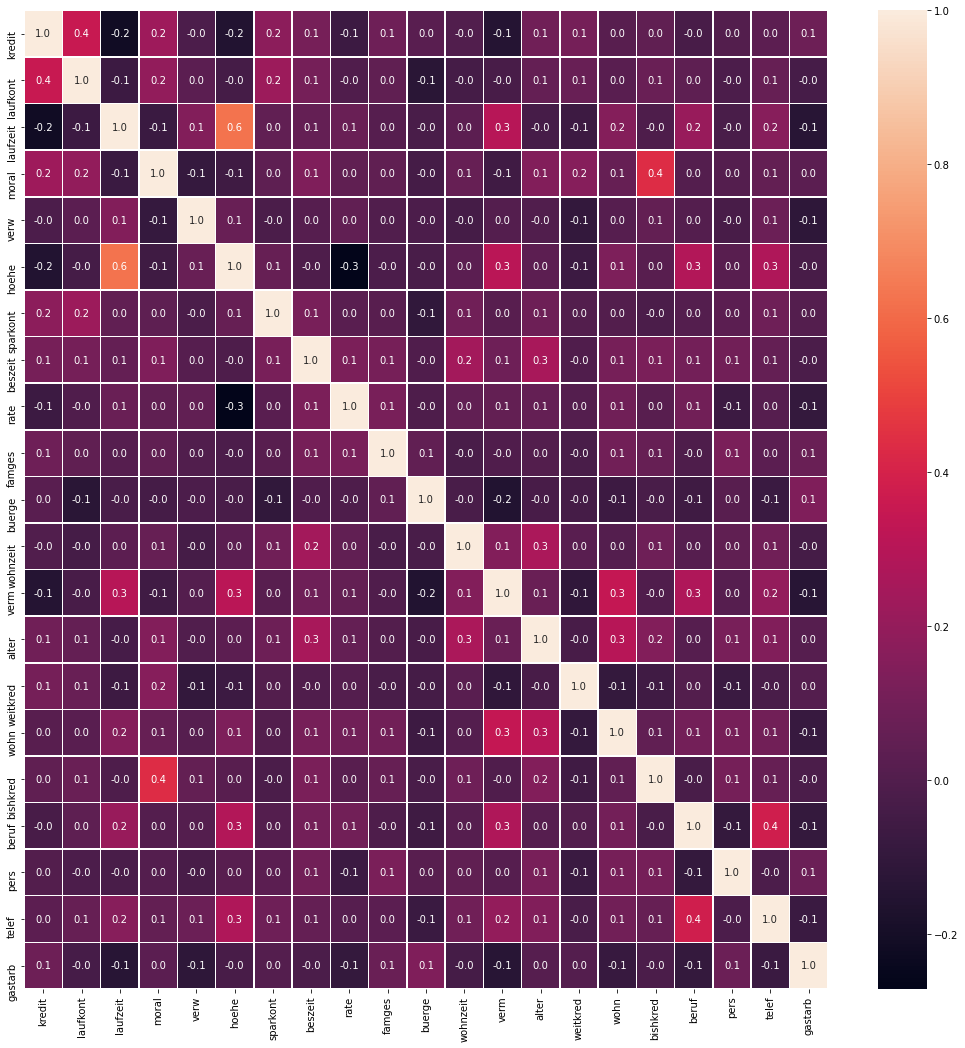

In [8]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(dataset.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

#### based on heatmap correlation (pearson correlation), columns that are probably correlated with kredit column as followed laufkont, laufzeit, moral, sparkont, hoehe column with heatmap score of 0.4, -0.2, 0.2, 0.2, -0.2

#### we can use this as a temporary reference, before feature selection in machine learning or tuning the parameter.

## Kredit:
1 : Kredit wurde zurückgezahlt
0 : Kredit wurde nicht ordnungsgemäß zurückgezahlt

In [9]:
dataset['kredit'].nunique()

2

In [10]:
dataset['kredit'].unique()

array([1, 0], dtype=int64)

<AxesSubplot:>

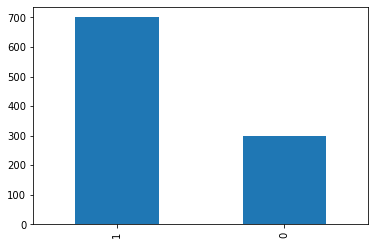

In [11]:
dataset['kredit'].value_counts().plot.bar()

#### 700 people pay back the credit meanwhile 300 people can not.
#### This data itself maybe a sample from larger data. The amount or quantity of data between 1 and 0 is imbalance. Therefore, we can say or see immediately, it leads us some problem when we're not careful enough.

## Laufkont (bestehendes lfd. Konto bei der Bank)
kein Kontostand bzw. Debetsaldo -> 2	
0 <= ... < 200 DM -> 3	
... >= 200 DM oder Gehaltskonto seit mind. 1 Jahr -> 4	
kein lfd. Konto -> 1

In [12]:
dataset['laufkont'].nunique()

4

In [13]:
dataset['laufkont'].unique()

array([1, 2, 4, 3], dtype=int64)

In [14]:
dataset['laufkont'].describe()

count    1000.000000
mean        2.577000
std         1.257638
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         4.000000
Name: laufkont, dtype: float64

<AxesSubplot:>

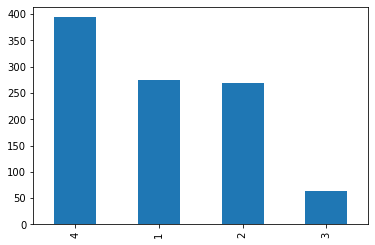

In [15]:
dataset['laufkont'].value_counts().plot.bar()

#### As the plot says, category 4 has the largest number of people, fallen in almost 400 people.
#### meanwhile, I was really suprised by the number of people in category 3 fallen far behind by the number of people in category 1 and 2 around one fifth. 

<AxesSubplot:xlabel='laufkont'>

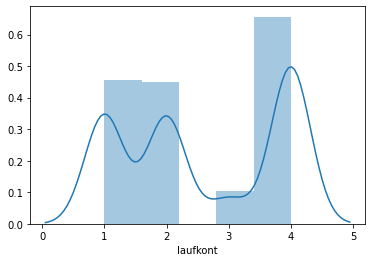

In [16]:
sns.distplot(dataset['laufkont'])

## Laufzeit (im Monat)

...<=6 ...................10		
6 < ... <= 12 ...........9	
12 < ... <= 18 .........8	
18 < ... <= 24 .........7	
24 < ... <= 30 .........6	
30 < ... <= 36 .........5	
36 < ... <= 42 .........4	
42 < ... <= 48 .........3	
48 < ... <= 54 .........2	
...> 54 ....................1


Q: Wird das Kredit im X Monat zurück gezählt?


In [17]:
dataset['laufzeit'].nunique()

33

In [18]:
dataset['laufzeit'].unique()

array([18,  9, 12, 10,  8,  6, 24, 11, 30, 48, 36, 15, 42, 21, 27, 33, 28,
        4, 47, 14, 39, 60,  5, 22, 54, 13, 16,  7, 20, 26, 45, 72, 40],
      dtype=int64)

In [19]:
dataset['laufzeit'].describe()

count    1000.000000
mean       20.903000
std        12.058814
min         4.000000
25%        12.000000
50%        18.000000
75%        24.000000
max        72.000000
Name: laufzeit, dtype: float64

## Moral (bisherige Zahlungsmoral)

keine Kredite bisher / alle bisherigen Kredite zurückgezahlt -> 2

frühere Kredite bei der Bank einwandfrei abgewickelt -> 4

noch bestehende Kredite bei der Bank bisher einwandfrei -> 3

früher zögernde Kreditführung -> 0

kritisches Konto / es bestehen weitere Kredite nicht bei der Bank -> 1


In [20]:
dataset['moral'].describe()

count    1000.00000
mean        2.54500
std         1.08312
min         0.00000
25%         2.00000
50%         2.00000
75%         4.00000
max         4.00000
Name: moral, dtype: float64

In [21]:
dataset['moral'].nunique()

5

In [22]:
dataset['moral'].unique()

array([4, 2, 3, 0, 1], dtype=int64)

In [23]:
dataset[dataset['moral'] == 4]['moral'].value_counts()

4    293
Name: moral, dtype: int64

In [24]:
dataset[dataset['moral'] == 3]['moral'].value_counts()

3    88
Name: moral, dtype: int64

In [25]:
dataset[dataset['moral'] == 2]['moral'].value_counts()

2    530
Name: moral, dtype: int64

In [26]:
dataset[dataset['moral'] == 1]['moral'].value_counts()

1    49
Name: moral, dtype: int64

In [27]:
dataset[dataset['moral'] == 0]['moral'].value_counts()

0    40
Name: moral, dtype: int64

<AxesSubplot:>

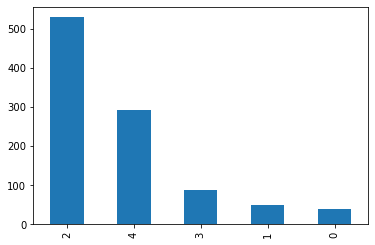

In [28]:
dataset['moral'].value_counts().plot.bar()

#### we can say the majority of people who takes the credit was on category 2 which is keine Kredite bisher / alle bisherigen Kredite zurückgezahlt

## Sparkont (Sparkonto oder Wertpapiere)
< 100,- DM .........................................2

100,- <= ... < 500,- DM .......................3

500,- <= ... < 1000,- DM .....................4

.>= 1000,- DM ....................................5

.nicht ermittelbar / kein Sparkonto .....1

In [29]:
dataset['sparkont'].describe()

count    1000.000000
mean        2.105000
std         1.580023
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max         5.000000
Name: sparkont, dtype: float64

In [30]:
dataset['sparkont'].value_counts()

1    603
5    183
2    103
3     63
4     48
Name: sparkont, dtype: int64

In [60]:
dataset['sparkont'].describe()

count    1000.000000
mean        2.105000
std         1.580023
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max         5.000000
Name: sparkont, dtype: float64

<AxesSubplot:>

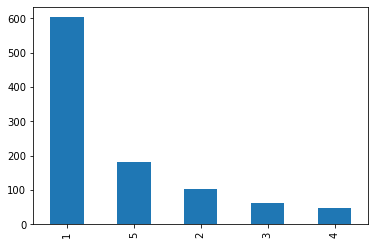

In [64]:
dataset['sparkont'].value_counts().plot.bar()

#### The majority of people who request a credit doesn't have a saving account / nicht ermittelbar / kein Sparkonto

# Hoehe

...<=500................	10	
500 < ... <= 1000	9	
1000 < ... <= 1500	8	
1500 < ... <= 2500	7	
2500 < ... <= 5000	6	
5000 < ... <= 7500	5	
7500 < ... <= 10000	4	
10000 < ... <= 15000 3 	
15000 < ... <= 20000 2	
...> 20000.........	1

In [66]:
dataset['hoehe'].describe()

count     1000.00000
mean      3271.24800
std       2822.75176
min        250.00000
25%       1365.50000
50%       2319.50000
75%       3972.25000
max      18424.00000
Name: hoehe, dtype: float64

<AxesSubplot:xlabel='sparkont'>

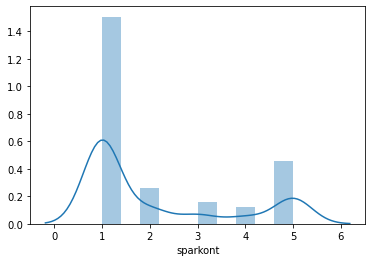

In [73]:

sns.distplot(dataset['sparkont'])

#### Apparently the largest number of people who ask for credit is the people who borrow more than 20000DM

## Grouping analysis

### By Gender / Status

##### männlich: geschieden / getrennt lebend  : 1
##### weiblich: geschieden / getrennt lebend / verheiratet : 2
##### männlich: ledig : 2
##### männlich: verheiratet / verwitwet : 3
##### weiblich: ledig : 4

In [75]:
dataset['famges'].value_counts()

3    548
2    310
4     92
1     50
Name: famges, dtype: int64

In [107]:
dataset[(dataset.famges == 1) | (dataset.famges == 2) | (dataset.famges == 3)]['famges'].count()

908

In [108]:
dataset['famges'].nunique()

4

##### can't be proceed because the category 2 has female and male with the same status at the same time. 

### By Age
##### 0 <= ... <= 25	: 1
##### 26 <= ... <= 39	: 2
##### 40 <= ... <= 59	: 3
##### 60 <= ... <= 64	: 5
##### >= 65	: 4

In [113]:
dataset['alter'].describe()

count    1000.00000
mean       35.54200
std        11.35267
min        19.00000
25%        27.00000
50%        33.00000
75%        42.00000
max        75.00000
Name: alter, dtype: float64

##### group the age of customer based on age

In [121]:
dataset[dataset['alter'] <= 25]['alter'].value_counts()

23    48
24    45
25    40
22    27
21    14
20    14
19     2
Name: alter, dtype: int64

In [123]:
dataset['age group'] = np.nan

lst = [dataset]

for col in lst:
    col.loc[(col['alter'] > 18) & (col['alter'] <= 25), 'age group'] = 'Young Adults'
    col.loc[(col['alter'] > 25) & (col['alter'] <= 39), 'age group'] = 'Adults'
    col.loc[(col['alter'] > 39) & (col['alter'] <= 59), 'age group'] = 'Senior'
    col.loc[col['alter'] > 59, 'age group'] = 'Elder' 
    
dataset.head()

,kredit,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,age group
0,1,1,18,4,2,1049,1,2,4,2,...,2,21,3,1,1,3,1,1,1,Young Adults
1,1,1,9,4,0,2799,1,3,2,3,...,1,36,3,1,2,3,2,1,1,Adults
2,1,2,12,2,9,841,2,4,2,2,...,1,23,3,1,1,2,1,1,1,Young Adults
3,1,1,12,4,0,2122,1,3,3,3,...,1,39,3,1,2,2,2,1,2,Adults
4,1,1,12,4,0,2171,1,3,4,3,...,2,38,1,2,2,2,1,1,2,Adults


In [124]:
dataset['age group']

0      Young Adults
1            Adults
2      Young Adults
3            Adults
4            Adults
           ...     
995    Young Adults
996          Senior
997          Adults
998          Senior
999          Adults
Name: age group, Length: 1000, dtype: object

In [126]:
dataset[['age group','verm']]

,age group,verm
0,Young Adults,2
1,Adults,1
2,Young Adults,1
3,Adults,1
4,Adults,2
...,...,...
995,Young Adults,1
996,Senior,1
997,Adults,4
998,Senior,4


In [139]:
dataset.groupby(['age group'])['verm']

age group
Adults          1224
Elder            125
Senior           594
Young Adults     415
Name: verm, dtype: int64

# part A

In [31]:
#how many rows and columns reflected in the dataset

dataset.shape

(1000, 21)

In [32]:
dataset.head()

,kredit,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,...,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [33]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   kredit    1000 non-null   int64
 1   laufkont  1000 non-null   int64
 2   laufzeit  1000 non-null   int64
 3   moral     1000 non-null   int64
 4   verw      1000 non-null   int64
 5   hoehe     1000 non-null   int64
 6   sparkont  1000 non-null   int64
 7   beszeit   1000 non-null   int64
 8   rate      1000 non-null   int64
 9   famges    1000 non-null   int64
 10  buerge    1000 non-null   int64
 11  wohnzeit  1000 non-null   int64
 12  verm      1000 non-null   int64
 13  alter     1000 non-null   int64
 14  weitkred  1000 non-null   int64
 15  wohn      1000 non-null   int64
 16  bishkred  1000 non-null   int64
 17  beruf     1000 non-null   int64
 18  pers      1000 non-null   int64
 19  telef     1000 non-null   int64
 20  gastarb   1000 non-null   int64
dtypes: int64(21)
memory usage: 164.2 KB


In [34]:
#min and max customer's age?
dataset['alter'].describe()

count    1000.00000
mean       35.54200
std        11.35267
min        19.00000
25%        27.00000
50%        33.00000
75%        42.00000
max        75.00000
Name: alter, dtype: float64

In [35]:
dataset['alter'].min()

19

In [36]:
dataset['alter'].max()

75

In [37]:
#count each status category?why?
dataset['famges'].value_counts()

3    548
2    310
4     92
1     50
Name: famges, dtype: int64

In [38]:
#How many high skilled workers customers reflected in the dataset?
dataset['beruf'].value_counts()

3    630
2    200
4    148
1     22
Name: beruf, dtype: int64

630 Pekerja terampil / karyawan terampil / pegawai negeri


In [40]:
#How many customers who own the house?
dataset['wohn'].value_counts()

2    714
1    179
3    107
Name: wohn, dtype: int64

107 yang punya rumah sendiri

In [41]:
#How many customers who have 'rich' Saving accounts?
dataset['laufkont'].value_counts()

4    394
1    274
2    269
3     63
Name: laufkont, dtype: int64

394 orang mempunyai saving acc lebih dari 200 DM

In [ ]:
#How many customers who do not have checking accounts or have zero checking account?



In [43]:
#Who is the one who have highest credit amount? 
#Show us the profile of the age, sex, job, housing, saving account, and checking account!

dataset['hoehe'].max()

18424

In [47]:
dataset[dataset['hoehe'] == 18424][['alter','beruf','wohn','laufkont']]

,alter,beruf,wohn,laufkont
976,32,4,2,2


In [48]:
#How many customers are classified as good risk and bad risk?
dataset['kredit'].value_counts()

1    700
0    300
Name: kredit, dtype: int64

In [50]:
# Is the average of credit amount for good risk is higher than bad risk?
dataset[dataset['kredit'] == 1]['hoehe'].mean()

2985.442857142857

In [51]:
dataset[dataset['kredit'] == 0]['hoehe'].mean()

3938.1266666666666

# Part B

In [53]:
#Check if there is any missing values on the dataset
dataset.isnull().sum()

kredit      0
laufkont    0
laufzeit    0
moral       0
verw        0
hoehe       0
sparkont    0
beszeit     0
rate        0
famges      0
buerge      0
wohnzeit    0
verm        0
alter       0
weitkred    0
wohn        0
bishkred    0
beruf       0
pers        0
telef       0
gastarb     0
dtype: int64

In [ ]:
#How to handle the missing values from the data
mean

In [56]:
#Check the number of unique values for each columns
dataset_col = dataset.columns.to_list()
dataset[dataset_col].nunique()

kredit        2
laufkont      4
laufzeit     33
moral         5
verw         10
hoehe       923
sparkont      5
beszeit       5
rate          4
famges        4
buerge        3
wohnzeit      4
verm          4
alter        53
weitkred      3
wohn          3
bishkred      4
beruf         4
pers          2
telef         2
gastarb       2
dtype: int64

In [ ]:
#How can we handle the Age column

In [ ]:
#How we can handle the Duration column

In [ ]:
#How much each customer has to pay for each month

In [57]:
#Average the credit amount based on their purpose
dataset[['verw','hoehe']]

,verw,hoehe
0,2,1049
1,0,2799
2,9,841
3,0,2122
4,0,2171
...,...,...
995,3,1987
996,0,2303
997,0,12680
998,3,6468


In [58]:
dataset.groupby('verw')['hoehe'].mean()

verw
0     3062.948718
1     5370.223301
2     3066.983425
3     2487.685714
4     1498.000000
5     2728.090909
6     3180.400000
8     1205.888889
9     4158.041237
10    8209.333333
Name: hoehe, dtype: float64

In [ ]:
#Show top three customers that pay the most each month

In [ ]:
#Show the installment distribution by their risk